# Launch MLOT and other methods

Basic run to check if everything is working

In [2]:
!python main.py -n -t --numberIteration 1 --max_iter 2

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=2, new_space=True, numberIteration=1, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=True, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     40.3  0.0  MLOT     2.62s

Mean results and total time
     40.3  0.0  MLOT     2.62s


Test all the methods

In [5]:
!python main.py -n -t --svd_solver full --max_iter 1 --adaptationAlgoUsed MLOT,OTDA,OTDA_pca,OT,CORAL,TCA,SA,NA,JDOTSVM,LMNN

Namespace(SA=False, adaptationAlgoUsed='MLOT,OTDA,OTDA_pca,OT,CORAL,TCA,SA,NA,JDOTSVM,LMNN', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=1, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='full', test_exp=True, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C ..........
     40.5  0.0  MLOT     1.76s
     40.3  0.0  OTDA     1.18s
     40.5  0.0  OTDA_pca   1.61s
     32.1  0.0  OT       1.14s
     25.4  0.0  CORAL    2.11s
     38.8  0.0  TCA      3.84s
     40.9  0.0  SA       0.29s
     26.0  0.0  NA       1.19s
     32.1  0.0  JDOTSVM   4.73s
     30.5  0.0  LMNN     1.59s

Mean results and total time
     40.5  0.0  MLOT     1.76s
     40.3  0.0  OTDA     1.18s
     40.5  0.0  OTDA_pca   1.61s
     32.1  0.0  OT       1.14s
     25.4  0.0  CORAL    2

Run of MLOT with default hyperparameter 

In [6]:
!python main.py -n --svd_solver full

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=10, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='full', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     41.3  0.0  MLOT    10.43s
A->D .
     39.5  0.0  MLOT     6.60s
A->W .
     48.1  0.0  MLOT     7.27s
C->A .
     55.5  0.0  MLOT    11.80s
C->D .
     52.9  0.0  MLOT     8.10s
C->W .
     54.9  0.0  MLOT     9.20s
D->A .
     40.0  0.0  MLOT     4.63s
D->C .
     33.7  0.0  MLOT     4.77s
D->W .
     85.4  0.0  MLOT     4.06s
W->A .
     40.1  0.0  MLOT     6.04s
W->C .
     36.1  0.0  MLOT     5.64s
W->D .
     75.2  0.0  MLOT     4.43s

Mean results and total time
     50.2  0.0  MLOT    82.97s


# Cross validation run

This code need to be run for each feature, each dataset and each method. This can easily be parallelized. The code bellow launch only one dataset for one method.

In [42]:
!python main.py -n -c -sa --adaptationAlgoUsed MLOT --featuresToUse surf --which_dataset 0 --time_cross_val 48 --pickle_name pickle

Namespace(SA=True, adaptationAlgoUsed='MLOT', cross_val=True, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=10, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.1, reg_e=0.1, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=False, time_cross_val=48.0, type_classifier='1NN', verbose=False, which_dataset=0)
A->C 
Train :  MLOT
0 : result 47.32985386221294 target result 37.702582368655385 d 40 max_iter 5 reg_e 0.3 reg_l 100 reg_cl 0.1 reg_pca -1 lr -1 margin 0.1


# Cross validation analysis

This code can be run only if the cross validation file are already saved. IMPORTANT : The -r parameter can solve some bug by deleting wrong run of the cross validation and reformating the pickle file.
The parameter "rule" is used to chose how we find the best hyperparameter set. The easiest way is to use max which take the best set of hyperparameter. This is not the only solution, for example, "mean" is also implemented which take the best hyperparameter on average. "precentile" is also implemented.

In [9]:
!python main_cross_val.py -l -la --adaptationAlgoUsed MLOT --featuresToUse surf_SA --save_pickle pickle_latex/ --rule max

amazon caltech10 MLOT max surf_SA
{'d': 50.0, 'reg_e': 0.05, 'reg_cl': 0.05, 'reg_l': 0.01, 'max_iter': 6.0, 'margin': 0.001, 'lr': 0.001, 'reg_pca': 1}
A->C ..........
     41.9  0.4  MLOT   560.41s

Mean results and total time
     41.9  0.4  MLOT   560.41s
amazon dslr MLOT max surf_SA
{'d': 80.0, 'reg_e': 0.05, 'reg_cl': 0.1, 'reg_l': 1.0, 'max_iter': 2.0, 'margin': 0.1, 'lr': 0.001, 'reg_pca': 1}
A->D ..........
     40.8  1.5  MLOT    63.85s

Mean results and total time
     40.8  1.5  MLOT    63.85s
amazon webcam MLOT max surf_SA
{'d': 100.0, 'reg_e': 0.05, 'reg_cl': 0.3, 'reg_l': 0.01, 'max_iter': 5.0, 'margin': 0.01, 'lr': 0.001, 'reg_pca': 1}
A->W ..........
     41.7  1.0  MLOT   214.64s

Mean results and total time
     41.7  1.0  MLOT   214.64s
caltech10 amazon MLOT max surf_SA
{'d': 90.0, 'reg_e': 0.05, 'reg_cl': 0.05, 'reg_l': 1.0, 'max_iter': 5.0, 'margin': 0.001, 'lr': 0.001, 'reg_pca': 1}
C->A ..........
     51.1  0.4  MLOT   397.37s

Mean results and total time
     

# Latex result of the cross validation

In [1]:
import recreate_table

In [2]:
recreate_table.creat_latex_tables("NA,LMNN,SA,CORAL,TCA,OT,OTDA,OTDA_pca,JDOTSVMe,MLOT")

\newpage Feature : surf_SA Rule : max Average : False \newline
\begin{tabular}{lllllllllll}
\toprule
         dataset &    NA &  LMNN &            SA & CORAL &            TCA &             OT &           OTDA &      OTDA_pca & JDOTSVMe &                   MLOT \\
\midrule
 A$\rightarrow$C &  26.0 &  40.3 &  40.2$\pm$0.2 &  25.4 &           40.0 &           33.9 &           40.2 &  39.4$\pm$0.5 &     39.9 &  \textbf{42.3}$\pm$0.6 \\
 A$\rightarrow$D &  25.5 &  36.9 &  39.3$\pm$2.5 &  26.8 &           31.8 &           30.6 &           40.1 &  39.6$\pm$1.1 &     37.6 &  \textbf{40.8}$\pm$0.8 \\
 A$\rightarrow$W &  29.8 &  38.0 &  39.9$\pm$1.3 &  26.8 &  \textbf{41.7} &           32.5 &           37.3 &  39.8$\pm$0.9 &     38.0 &           41.3$\pm$1.1 \\
 C$\rightarrow$A &  23.7 &  46.0 &  41.3$\pm$1.1 &  23.6 &           39.8 &           41.0 &  \textbf{52.7} &  48.5$\pm$0.7 &     48.1 &           51.5$\pm$0.8 \\
 C$\rightarrow$D &  25.5 &  45.9 &  45.4$\pm$1.2 &  26.1 &           44.6 &

In [6]:
recreate_table.creat_latex_tables("NA,LMNN,SA,CORAL,TCA,OT,OTDA,OTDA_pca,JDOTSVMe,MLOT",
                                  features="decaf6_SA")

\newpage Feature : decaf6_SA Rule : max Average : False \newline
\begin{tabular}{lllllllllll}
\toprule
         dataset &    NA &           LMNN &                     SA &          CORAL &            TCA &    OT &  OTDA &      OTDA_pca &       JDOTSVMe &                   MLOT \\
\midrule
 A$\rightarrow$C &  71.7 &           80.6 &           81.1$\pm$0.3 &           72.2 &           77.7 &  82.2 &  80.5 &  79.7$\pm$0.3 &  \textbf{83.1} &           81.6$\pm$0.4 \\
 A$\rightarrow$D &  73.9 &           81.5 &           83.4$\pm$0.7 &           72.0 &  \textbf{84.1} &  77.7 &  76.4 &  73.9$\pm$1.3 &           70.7 &           75.3$\pm$0.8 \\
 A$\rightarrow$W &  68.1 &           72.5 &           74.7$\pm$1.0 &           64.1 &           71.9 &  71.2 &  71.9 &  75.0$\pm$0.6 &  \textbf{76.9} &           72.1$\pm$0.3 \\
 C$\rightarrow$A &  87.3 &  \textbf{91.4} &           87.9$\pm$0.4 &           81.3 &           89.1 &  90.4 &  86.8 &  87.6$\pm$0.4 &           90.5 &           90.8$\pm$0.1 \

In [8]:
recreate_table.creat_latex_tables("NA,LMNN,SA,CORAL,TCA,OT,OTDA,OTDA_pca,JDOTSVMe,MLOT",
                                  features="office31fc7_SA")

\newpage Feature : office31fc7_SA Rule : max Average : False \newline
\begin{tabular}{lllllllllll}
\toprule
         dataset &    NA &           LMNN &                     SA & CORAL &   TCA &             OT &           OTDA &      OTDA_pca & JDOTSVMe &                   MLOT \\
\midrule
 A$\rightarrow$D &  59.6 &           50.6 &  \textbf{60.6}$\pm$0.5 &  55.6 &  58.0 &           56.8 &           55.4 &  53.6$\pm$0.0 &     58.6 &           54.7$\pm$0.1 \\
 A$\rightarrow$W &  54.0 &           51.8 &  \textbf{56.3}$\pm$0.2 &  56.1 &  52.7 &           49.2 &           50.8 &  53.3$\pm$0.1 &     51.9 &           54.1$\pm$0.2 \\
 D$\rightarrow$A &  42.4 &           48.0 &           45.0$\pm$0.1 &  42.2 &  44.0 &           48.8 &           48.1 &  48.3$\pm$0.1 &     45.7 &  \textbf{50.4}$\pm$0.0 \\
 D$\rightarrow$W &  90.9 &           94.7 &           93.2$\pm$0.1 &  91.7 &  91.7 &           92.1 &  \textbf{95.0} &  94.0$\pm$0.1 &     90.9 &           92.6$\pm$0.1 \\
 W$\rightarrow$A &  40.

In [2]:
recreate_table.average_result() # The value are hard coded in this function

AVG & 53.8 & 62.6 & 65.1 $\pm$ 0.6 & 58.0 & 64.0 & 63.5 & 65.6 & 65.6 $\pm$ 0.6 & 63.0 & 67.0 $\pm$ 0.5 & \\


# Reproduce Figure 1

 This code can be run alone and doesn't need any other file.

In [1]:
import toy_dataset

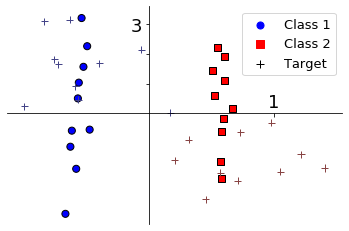

In [2]:
toy_dataset.main(algoName="NA")

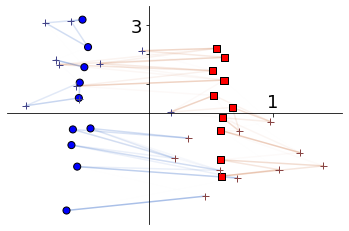

In [3]:
toy_dataset.main(algoName="OTDA")

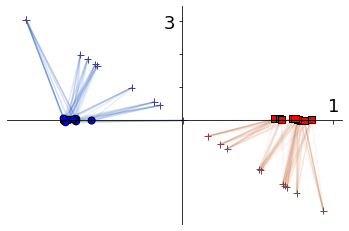

In [4]:
toy_dataset.main(algoName="MLOT")

# Cheat tables

This can be used to recreate all the table in the paper. However to allow more complex cross validation, another code is provided above. It will launch again all the method with the best hyperparameters set, this is essential for random methods.
The code bellow can be run only if the cross validation file are already saved.

In [1]:
import recreate_table

In [16]:
recreate_table.creat_all_cheat_tables("JDOTSVMe,OT,TCA,LMNN,SA,OTDA,OTDA_pca,MLOT")

\newpage Feature :$ surf_SA $ Cheat  True \newline
\begin{tabular}{lrrrrrlll}
\toprule
         dataset &  JDOTSVMe &      OT &    TCA &    LMNN &     SA &           OTDA &       OTDA_pca &           MLOT \\
\midrule
 A$\rightarrow$C &      41.5 &    33.8 &   40.0 &    41.9 &   40.5 &           42.2 &           42.6 &  \textbf{43.5} \\
 A$\rightarrow$D &      42.0 &    34.4 &   33.1 &    42.7 &   40.6 &           47.1 &           49.2 &  \textbf{50.6} \\
 A$\rightarrow$W &      38.6 &    33.9 &   41.7 &    40.7 &   41.6 &           46.4 &           50.2 &  \textbf{51.3} \\
 C$\rightarrow$A &      48.9 &    45.2 &   40.6 &    48.4 &   42.3 &           53.3 &           55.8 &  \textbf{57.8} \\
 C$\rightarrow$D &      49.7 &    44.6 &   44.6 &    47.1 &   46.8 &           55.4 &           56.5 &  \textbf{57.3} \\
 C$\rightarrow$W &      43.4 &    38.6 &   38.6 &    44.4 &   41.0 &           53.9 &           55.3 &  \textbf{59.2} \\
 D$\rightarrow$A &      33.6 &    30.7 &   34.0 &    37.9

\begin{tabular}{lrrrlrlll}
\toprule
         dataset &  JDOTSVMe &      OT &     TCA &           LMNN &      SA &           OTDA &       OTDA_pca &           MLOT \\
\midrule
 A$\rightarrow$D &      59.2 &    56.8 &    58.4 &           60.6 &    61.4 &  \textbf{64.9} &           64.5 &           63.3 \\
 A$\rightarrow$W &      60.4 &    54.8 &    52.7 &           55.7 &    56.6 &           66.4 &  \textbf{67.5} &           65.3 \\
 D$\rightarrow$A &      50.8 &    51.1 &    44.1 &           48.3 &    45.5 &           54.3 &           54.4 &  \textbf{57.9} \\
 D$\rightarrow$W &      91.7 &    94.7 &    91.7 &           95.6 &    93.3 &             95 &             95 &  \textbf{95.7} \\
 W$\rightarrow$A &      49.4 &    49.7 &    42.7 &           45.9 &    45.5 &           52.7 &           52.7 &  \textbf{56.2} \\
 W$\rightarrow$D &      95.0 &    97.2 &    95.8 &  \textbf{99.2} &    98.8 &           97.2 &           97.2 &           97.8 \\
             AVG &      67.8 &    67.4 &    6

In [8]:
recreate_table.creat_all_cheat_tables("NA,SA,CORAL,TCA,OT,OTDA,MLOT")

\newpage Feature :$ surf_SA $ Cheat  True \newline
\begin{tabular}{lrrrrrll}
\toprule
         dataset &    NA &     SA &  CORAL &    TCA &      OT &           OTDA &           MLOT \\
\midrule
 A$\rightarrow$C &  26.0 &   40.5 &   25.4 &   40.0 &    33.8 &           42.2 &  \textbf{43.5} \\
 A$\rightarrow$D &  25.5 &   40.6 &   26.8 &   33.1 &    34.4 &           47.1 &  \textbf{50.6} \\
 A$\rightarrow$W &  29.8 &   41.6 &   26.8 &   41.7 &    33.9 &           46.4 &  \textbf{51.3} \\
 C$\rightarrow$A &  23.7 &   42.3 &   23.6 &   40.6 &    45.2 &           53.3 &  \textbf{57.8} \\
 C$\rightarrow$D &  25.5 &   46.8 &   26.1 &   44.6 &    44.6 &           55.4 &  \textbf{57.3} \\
 C$\rightarrow$W &  25.8 &   41.0 &   23.7 &   38.6 &    38.6 &           53.9 &  \textbf{59.2} \\
 D$\rightarrow$A &  28.5 &   36.4 &   28.8 &   34.0 &    30.7 &           38.4 &  \textbf{42.5} \\
 D$\rightarrow$C &  26.3 &   33.1 &   30.0 &   32.2 &    32.3 &  \textbf{36.5} &           36.4 \\
 D$\rightarrow

\begin{tabular}{lrlrrlll}
\toprule
         dataset &    NA &             SA &  CORAL &     TCA &             OT &           OTDA &           MLOT \\
\midrule
 A$\rightarrow$D &  59.6 &  \textbf{61.0} &   55.6 &    58.0 &           56.8 &           55.4 &           54.8 \\
 A$\rightarrow$W &  54.0 &  \textbf{56.4} &   56.1 &    52.7 &           49.2 &           50.8 &           53.7 \\
 D$\rightarrow$A &  42.4 &             45 &   42.2 &    44.0 &           48.8 &           48.1 &  \textbf{50.4} \\
 D$\rightarrow$W &  90.9 &           93.2 &   91.7 &    91.7 &           92.1 &  \textbf{95.0} &           92.6 \\
 W$\rightarrow$A &  40.8 &           45.1 &   41.0 &    42.5 &  \textbf{48.3} &           46.9 &           47.6 \\
 W$\rightarrow$D &  97.8 &  \textbf{98.6} &   98.0 &    95.6 &           96.8 &           95.4 &           97.8 \\
             AVG &  64.3 &  \textbf{66.5} &   64.1 &    64.1 &           65.3 &           65.3 &           66.2 \\
              nb &   2.0 &          

# Images

The table can be recreate only if the speficic_comparaison has already been launch.

In [ ]:
!python main.py -n --specific_comparaison OTDAvsMLOT --adaptationAlgoUsed OTDA,MLOT --pickle_name pickle_specific/

In [1]:
import recreate_table

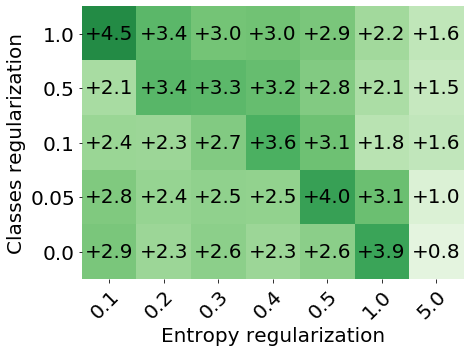

In [2]:
recreate_table.display_image(comparaison=True, color_map='Greens', save_image=True)

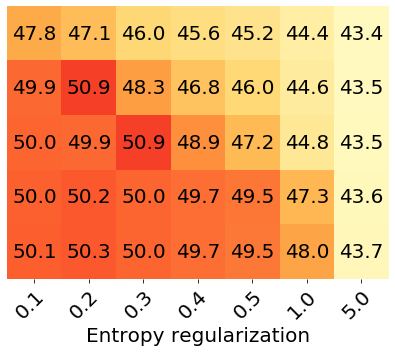

In [3]:
recreate_table.display_image(comparaison=False, color_map='YlOrRd', save_image=True)

# Non-exhaustive comparison between MLOT and ML + OTDA

In [28]:
!python main.py -n --adaptationAlgoUsed MLOT --svd_solver full

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=10, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='full', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     41.3  0.0  MLOT    10.40s
A->D .
     39.5  0.0  MLOT     6.49s
A->W .
     48.1  0.0  MLOT     6.59s
C->A .
     55.5  0.0  MLOT    11.41s
C->D .
     52.9  0.0  MLOT     8.34s
C->W .
     54.9  0.0  MLOT     8.50s
D->A .
     40.0  0.0  MLOT     4.53s
D->C .
     33.7  0.0  MLOT     4.33s
D->W .
     85.4  0.0  MLOT     4.29s
W->A .
     40.1  0.0  MLOT     6.22s
W->C .
     36.1  0.0  MLOT    14.22s
W->D .
     75.2  0.0  MLOT     8.13s

Mean results and total time
     50.2  0.0  MLOT    93.43s


In [26]:
!python main.py -n --adaptationAlgoUsed MLOT --svd_solver full --max_iter 2 --max_inner_iter_grad 1000 --reg_l 0

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1000, max_iter=2, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=0.0, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='full', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     40.5  0.0  MLOT     7.24s
A->D .
     38.9  0.0  MLOT     4.50s
A->W .
     44.7  0.0  MLOT    21.79s
C->A .
     54.0  0.0  MLOT    15.11s
C->D .
     47.8  0.0  MLOT     7.52s
C->W .
     50.5  0.0  MLOT    18.17s
D->A .
     39.2  0.0  MLOT     4.56s
D->C .
     33.3  0.0  MLOT     4.68s
D->W .
     84.1  0.0  MLOT     7.75s
W->A .
     39.0  0.0  MLOT     2.17s
W->C .
     35.4  0.0  MLOT     8.03s
W->D .
     79.6  0.0  MLOT     3.69s

Mean results and total time
     48.9  0.0  MLOT   105.20s


In [27]:
!python main.py -n --adaptationAlgoUsed MLOT

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=10, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C ..........
     41.9  0.5  MLOT   573.42s
A->D ..........
     40.0  1.7  MLOT   374.13s
A->W ..........
     49.2  1.3  MLOT   393.84s
C->A ..........
     56.1  0.5  MLOT   644.97s
C->D ..........
     52.6  1.0  MLOT   449.56s
C->W ..........
     55.0  1.2  MLOT   461.70s
D->A ..........
     40.3  0.7  MLOT   225.84s
D->C ..........
     34.9  0.6  MLOT   235.67s
D->W ..........
     83.2  1.4  MLOT   217.49s
W->A ..........
     40.6  0.6  MLOT   299.21s
W->C ..........
     35.5  0.5  MLOT   282.59s
W->D ..........
     77.6  1.3  MLOT 

In [31]:
!python main.py -n --adaptationAlgoUsed MLOT --max_iter 2 --max_inner_iter_grad 1000 --reg_l 0

Namespace(SA=False, adaptationAlgoUsed='MLOT', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1000, max_iter=2, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=0.0, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C ..........
     40.5  0.3  MLOT   399.35s
A->D ..........
     40.4  1.5  MLOT   608.33s
A->W ..........
     45.5  1.4  MLOT   474.73s
C->A ..........
     54.5  0.6  MLOT   833.26s
C->D ..........
     49.1  1.9  MLOT   829.90s
C->W ..........
     51.3  1.1  MLOT   930.67s
D->A ..........
     39.1  0.3  MLOT   281.25s
D->C ..........
     33.8  0.5  MLOT   278.25s
D->W ..........
     84.6  0.7  MLOT   212.75s
W->A ..........
     39.2  0.6  MLOT   280.92s
W->C ..........
     35.3  0.4  MLOT   319.45s
W->D ..........
     77.1  1.3  M

In [29]:
!python main.py -n --adaptationAlgoUsed MLOT_id --max_iter 2 --max_inner_iter_grad 1000 --reg_l 0

Namespace(SA=False, adaptationAlgoUsed='MLOT_id', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1000, max_iter=2, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=0.0, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     40.3  0.0  MLOT_id  10.80s
A->D .
     39.5  0.0  MLOT_id   6.55s
A->W .
     42.4  0.0  MLOT_id  16.37s
C->A .
     51.3  0.0  MLOT_id  30.20s
C->D .
     48.4  0.0  MLOT_id   6.69s
C->W .
     49.2  0.0  MLOT_id  21.43s
D->A .
     36.7  0.0  MLOT_id   1.86s
D->C .
     35.4  0.0  MLOT_id   1.98s
D->W .
     82.4  0.0  MLOT_id   1.60s
W->A .
     39.6  0.0  MLOT_id   2.72s
W->C .
     35.7  0.0  MLOT_id   2.58s
W->D .
     75.2  0.0  MLOT_id   3.47s

Mean results and total time
     48.0  0.0  MLOT_id 106.23s


In [30]:
!python main.py -n --adaptationAlgoUsed MLOT_id

Namespace(SA=False, adaptationAlgoUsed='MLOT_id', cross_val=False, cuda=False, d=70, detach=False, featuresToUse='surf', lr=0.001, margin=10, max_inner_iter_grad=1, max_iter=10, new_space=True, numberIteration=10, pickle_name='test', reg_cl=0.2, reg_e=0.2, reg_l=1, reg_pca=1, rule='median', save_pickle=False, specific_comparaison='None', svd_solver='auto', test_exp=False, time_cross_val=1, type_classifier='1NN', verbose=False, which_dataset=-1)
A->C .
     40.6  0.0  MLOT_id  11.29s
A->D .
     42.0  0.0  MLOT_id   7.53s
A->W .
     43.4  0.0  MLOT_id   7.85s
C->A .
     51.7  0.0  MLOT_id  11.83s
C->D .
     46.5  0.0  MLOT_id   8.45s
C->W .
     49.8  0.0  MLOT_id   8.79s
D->A .
     38.1  0.0  MLOT_id   4.33s
D->C .
     34.8  0.0  MLOT_id   5.20s
D->W .
     81.7  0.0  MLOT_id   3.90s
W->A .
     38.1  0.0  MLOT_id   4.84s
W->C .
     35.1  0.0  MLOT_id   5.50s
W->D .
     75.2  0.0  MLOT_id   3.96s

Mean results and total time
     48.1  0.0  MLOT_id  83.47s


# Pytorch version of MLOT

OTSAMLl and OTSAMLnl are two implementation of MLOT but instead of using LMNN update, we use pytorch automatic differentiation. This explain the little difference between the OTSAMLl (which has only a linear matrix as NN) and OTML. OTSAMLnl is the non-linear version, the exact architecture of this NN is available in the code. This code is still in progress and it is clearly not optimize as there is very often swap between numpy and torch tensor.

In [10]:
import recreate_table

In [11]:
recreate_table.creat_all_cheat_tables(names="OTSAMLl,OTSAMLnl", features="surf_SA",)

\newpage Feature :$ surf_SA $ Cheat  True \newline
\begin{tabular}{lll}
\toprule
         dataset &        OTSAMLl &       OTSAMLnl \\
\midrule
 A$\rightarrow$C &  \textbf{43.1} &           42.9 \\
 A$\rightarrow$D &           45.9 &  \textbf{49.0} \\
 A$\rightarrow$W &  \textbf{52.9} &           52.5 \\
 C$\rightarrow$A &           53.4 &  \textbf{55.7} \\
 C$\rightarrow$D &           51.6 &  \textbf{55.4} \\
 C$\rightarrow$W &           56.6 &  \textbf{56.9} \\
 D$\rightarrow$A &  \textbf{43.2} &           40.9 \\
 D$\rightarrow$C &           36.7 &  \textbf{37.1} \\
 D$\rightarrow$W &  \textbf{90.8} &           90.8 \\
 W$\rightarrow$A &  \textbf{44.5} &           43.8 \\
 W$\rightarrow$C &           36.6 &  \textbf{37.2} \\
 W$\rightarrow$D &  \textbf{92.4} &           92.4 \\
             AVG &             54 &  \textbf{54.6} \\
              nb &          366.8 &          498.7 \\
\bottomrule
\end{tabular}

\newpage Feature :$ surf_SA $ Cheat  False \newline
\begin{tabular}{lll}
